<a href="https://colab.research.google.com/github/thanhdtnguyen/Deep-Learning-with-Keras-Tensorflow/blob/master/classifying_newswires_multilabel_multiclass_reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Multilabel, multiclass classification
#### 46 classes

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
print(len(train_data))
print(len(test_data))

8982
2246


In [6]:
print(train_data[0])
print(train_labels[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


In [11]:
def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results 

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [13]:
def vectorize_label(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

y_train = vectorize_label(train_labels)
y_test = vectorize_label(test_labels)

In [36]:
# build-in way to prepare the data in Keras

# from tensorflow.keras.utils import to_categorical 
# y_train = to_categorical(train_labels)
# y_test = to_categorical(test_labels)

# another way to encode the labels: to cast them as an interger tensor

# y_train = np.array(train_labels)
# y_test = np.array(test_labels)
# loss = "sparse_categorical_crossentropy"

In [17]:
# build model and compiler

model = keras.models.Sequential([layers.Dense(64, activation="relu"),
                                 layers.Dense(64, activation="relu"),
                                 layers.Dense(46, activation="softmax")])

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [18]:
# create validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [19]:
# train the model

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 53ms/step - loss: 2.6279 - accuracy: 0.4838 - val_loss: 1.7851 - val_accuracy: 0.5980
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 1.4652 - accuracy: 0.6840 - val_loss: 1.3466 - val_accuracy: 0.6970
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 1.0664 - accuracy: 0.7679 - val_loss: 1.1394 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.8186 - accuracy: 0.8286 - val_loss: 1.0202 - val_accuracy: 0.7880
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6397 - accuracy: 0.8706 - val_loss: 0.9437 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5103 - accuracy: 0.8964 - val_loss: 0.8972 - val_accuracy: 0.8160
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4066 - accuracy: 0.9168 - val_loss: 0.8808 - val_accuracy: 0.8100
Epoch 8/20
16

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

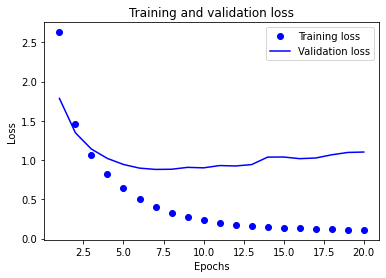

In [22]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

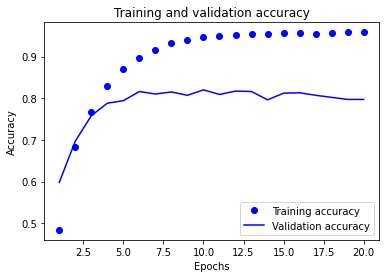

In [23]:
plt.clf()
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
# retrain the model until 10th epoch

model = keras.models.Sequential([layers.Dense(64, activation="relu"),
                                 layers.Dense(64, activation="relu"),
                                 layers.Dense(46, activation="softmax")])

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

model.fit(partial_x_train, partial_y_train,
          epochs = 10,
          batch_size = 512,
          validation_data = (x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/10
16/16 [==============================] - 1s 49ms/step - loss: 2.7521 - accuracy: 0.4635 - val_loss: 1.7790 - val_accuracy: 0.6570
Epoch 2/10
16/16 [==============================] - 1s 41ms/step - loss: 1.4500 - accuracy: 0.7115 - val_loss: 1.3171 - val_accuracy: 0.7300
Epoch 3/10
16/16 [==============================] - 1s 43ms/step - loss: 1.0680 - accuracy: 0.7780 - val_loss: 1.1419 - val_accuracy: 0.7510
Epoch 4/10
16/16 [==============================] - 1s 43ms/step - loss: 0.8444 - accuracy: 0.8207 - val_loss: 1.0521 - val_accuracy: 0.7710
Epoch 5/10
16/16 [==============================] - 1s 41ms/step - loss: 0.6796 - accuracy: 0.8544 - val_loss: 0.9779 - val_accuracy: 0.7950
Epoch 6/10
16/16 [==============================] - 1s 41ms/step - loss: 0.5479 - accuracy: 0.8846 - val_loss: 0.9468 - val_accuracy: 0.7960
Epoch 7/10
16/16 [==============================] - 1s 42ms/step - loss: 0.4469 - accuracy: 0.9053 - val_loss: 0.9125 - val_accuracy: 0.8100
Epoch 8/10
16

In [50]:
model.save("multiclass_reuters_model.h5")

In [26]:
# test the accuracy of a random baseline

import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

0.1856634016028495

In [35]:
# prediction

predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
0.99999994
3


In [48]:
# retrain the model with larger layers

model = keras.models.Sequential([layers.Dense(128, activation="relu"),
                                 layers.Dense(128, activation="relu"),
                                 layers.Dense(46, activation="softmax")])

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

model.fit(partial_x_train, partial_y_train,
          epochs = 10,
          batch_size = 512,
          validation_data = (x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/10
16/16 [==============================] - 1s 77ms/step - loss: 2.2092 - accuracy: 0.5469 - val_loss: 1.4106 - val_accuracy: 0.6650
Epoch 2/10
16/16 [==============================] - 1s 66ms/step - loss: 1.1251 - accuracy: 0.7565 - val_loss: 1.0978 - val_accuracy: 0.7770
Epoch 3/10
16/16 [==============================] - 1s 67ms/step - loss: 0.8026 - accuracy: 0.8282 - val_loss: 0.9997 - val_accuracy: 0.7940
Epoch 4/10
16/16 [==============================] - 1s 66ms/step - loss: 0.5763 - accuracy: 0.8807 - val_loss: 1.0074 - val_accuracy: 0.7840
Epoch 5/10
16/16 [==============================] - 1s 66ms/step - loss: 0.4238 - accuracy: 0.9079 - val_loss: 0.9038 - val_accuracy: 0.8120
Epoch 6/10
16/16 [==============================] - 1s 67ms/step - loss: 0.3193 - accuracy: 0.9311 - val_loss: 0.9062 - val_accuracy: 0.8000
Epoch 7/10
16/16 [==============================] - 1s 68ms/step - loss: 0.2583 - accuracy: 0.9434 - val_loss: 0.9155 - val_accuracy: 0.8100
Epoch 8/10
16